# GPU configuration

如果将项目在 google colabotary上运行，可以配置GPU


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


检查GPU是否分配成功

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# import necessary packages


install some packages from pip

In [0]:
!pip install imdbpy wget tmdbsimple 

     |████████████████████████████████| 286kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


import all the required packages

In [0]:
import urllib.request
import requests
import json
from imdb import IMDb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

**TEST:** the folder that saves posters of TV series

In [0]:
# set here the path where you want the scraped folders to be saved!
poster_folder='TVs_posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

**TEST:**Check the folder

In [0]:
poster_folder

'TVs_posters_final/'

# Retrive TMDB data 

一些自定义的获取TMDB数据的函数

In [0]:
# For the purpose of this example, i will be working with the world-famous TV series 'Game of Thrones'

# Generate your own API key as explained
api_key = '04178dacbf3055a2d253b5160fd433ba' #Enter your own API key here to run the code below. 

tmdb.API_KEY = api_key #This sets the API key setting for the tmdb object
search = tmdb.Search() #this instantiates a tmdb "search" object which allows your to search for the videos

# These functions take in a string movie or tv show name i.e. like "The Matrix" or "Interstellar"
# What they return is pretty much clear in the name - Poster, ID , Info or genre of the tv show
def grab_poster_tmdb(tvshow):
    response = search.tv(query=tvshow)
    id=response['results'][0]['id']
    tvshow = tmdb.TV(id)
    posterp=tvshow.info()['poster_path']
    title=tvshow.info()['original_name']
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)

def get_tvshow_id_tmdb(tvshow):
    response = search.tv(query=tvshow)
    tv_id=response['results'][0]['id']
    return tv_id

def get_tvshow_info_tmdb(tvshow):
    response = search.tv(query=tvshow)
    id=response['results'][0]['id']
    tvshow = tmdb.TV(id)
    info=tvshow.info()
    return info

def get_tvshow_genres_tmdb(tvshow):
    response = search.tv(query=tvshow)
    id=response['results'][0]['id']
    tvshow = tmdb.TV(id)
    genres=tvshow.info()['genres']
    return genres

**Test:**try some functions

In [0]:
print(get_tvshow_genres_tmdb("Game of Thrones"))

[{'id': 10765, 'name': 'Sci-Fi & Fantasy'}, {'id': 18, 'name': 'Drama'}, {'id': 10759, 'name': 'Action & Adventure'}]


In [0]:
info=get_tvshow_info_tmdb("Game of Thrones")
print("All the Tv shows information from TMDB gets stored in a dictionary with the following keys for easy access -")
info.keys()

All the Tv shows information from TMDB gets stored in a dictionary with the following keys for easy access -


dict_keys(['backdrop_path', 'created_by', 'episode_run_time', 'first_air_date', 'genres', 'homepage', 'id', 'in_production', 'languages', 'last_air_date', 'last_episode_to_air', 'name', 'next_episode_to_air', 'networks', 'number_of_episodes', 'number_of_seasons', 'origin_country', 'original_language', 'original_name', 'overview', 'popularity', 'poster_path', 'production_companies', 'seasons', 'status', 'type', 'vote_average', 'vote_count'])

In [0]:
info=get_tvshow_info_tmdb("Game of Thrones")
print( info['backdrop_path'])

/qsD5OHqW7DSnaQ2afwz8Ptht1Xb.jpg


# Retrive IMDB data

In [0]:
# Create the IMDB object that will be used to access the IMDb's database.
imdb_object = IMDb() # by default access the web.

# Search for a movie or tvshows (get a list of tv show or movie objects).
results = imdb_object.search_movie('Game of Thrones')

# As this returns a list of all tv shows  containing the title, we pick the first element
tv = results[0]

imdb_object.update(tv)

print("All the information we can get about this tv shows from IMDB-")
tv.keys()

All the information we can get about this tv shows from IMDB-


['title',
 'kind',
 'year',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'certificates',
 'number of seasons',
 'rating',
 'votes',
 'cover url',
 'plot outline',
 'languages',
 'series years',
 'akas',
 'seasons',
 'writer',
 'production companies',
 'distributors',
 'special effects',
 'other companies',
 'plot',
 'synopsis',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']

**TEST:**try the function

In [0]:
print("The genres associated with the tv show are - ",tv['genres'])

The genres associated with the tv show are -  ['Action', 'Adventure', 'Drama', 'Fantasy', 'Romance']


See the difference of genre representation in IMDB & TMDB

In [0]:
print ("The genres for GOT pulled from IMDB are -",tv['genres'])
print ("The genres for GOT pulled from TMDB are -",get_tvshow_genres_tmdb("Game of Thrones"))

The genres for GOT pulled from IMDB are - ['Action', 'Adventure', 'Drama', 'Fantasy', 'Romance']
The genres for GOT pulled from TMDB are - [{'id': 10765, 'name': 'Sci-Fi & Fantasy'}, {'id': 18, 'name': 'Drama'}, {'id': 10759, 'name': 'Action & Adventure'}]


  # TEST: use top-20 tv shows to see their genres

In [0]:
all_tvshows=tmdb.TV()
top_tvshows=all_tvshows.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 tvshows
print(len(top_tvshows['results']))
top20_tvs=top_tvshows['results']

20


In [0]:
#The hottest tv show
first_tv=top20_tvs[0]
print(first_tv)
print(first_tv['original_name'])

{'original_name': 'Game of Thrones', 'genre_ids': [18, 10759, 10765], 'name': 'Game of Thrones', 'popularity': 928.377, 'origin_country': ['US'], 'vote_count': 5701, 'first_air_date': '2011-04-17', 'backdrop_path': '/qsD5OHqW7DSnaQ2afwz8Ptht1Xb.jpg', 'original_language': 'en', 'id': 1399, 'vote_average': 8.2, 'overview': "Seven noble families fight for control of the mythical land of Westeros. Friction between the houses leads to full-scale war. All while a very ancient evil awakens in the farthest north. Amidst the war, a neglected military order of misfits, the Night's Watch, is all that stands between the realms of men and icy horrors beyond.", 'poster_path': '/u3bZgnGQ9T01sWNhyveQz0wH0Hl.jpg'}
Game of Thrones


In [0]:
for i in range(len(top20_tvs)):
    tv=top20_tvs[i]
    title=tv['original_name']
    print(title)
    if i==4:
        break

Game of Thrones
ワンパンマン
The Flash
Arrow
The 100


In [0]:
for i in range(len(top20_tvs)):
    tv=top20_tvs[i]
    genres=tv['genre_ids']
    print(genres)
    if i==4:
        break

[18, 10759, 10765]
[16, 35, 10759]
[18, 10765]
[80, 18, 9648, 10759]
[18, 10765]


# Convert the numbers into the genre names

In [0]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.tv_list()['genres']

In [0]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    #print(genre_id)
    Genre_ID_to_name[genre_id]=genre_name

**TEST:** test if it works

In [0]:
for i in range(len(top20_tvs)):
    tv=top20_tvs[i]
    title=tv['original_name']
    genre_ids=tv['genre_ids']
    genre_names=[]
    for id in genre_ids:
        genre_name=Genre_ID_to_name[id]
        genre_names.append(genre_name)
    print (title,genre_names)
    if i==4:
        break

Game of Thrones ['Drama', 'Action & Adventure', 'Sci-Fi & Fantasy']
ワンパンマン ['Animation', 'Comedy', 'Action & Adventure']
The Flash ['Drama', 'Sci-Fi & Fantasy']
Arrow ['Crime', 'Drama', 'Mystery', 'Action & Adventure']
The 100 ['Drama', 'Sci-Fi & Fantasy']


In [0]:
all_tvshows=tmdb.TV()
top_tvshows=all_tvshows.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 tvshows
len(top_tvshows['results'])
top20_tvs=top_tvshows['results']

# Prepare for the dataset:scrape a tv show list

In [0]:
pages_with_1000 = 6
pages_with_10000 = 51

In [0]:
# Comment out this cell once the data is saved into pickle file.
all_tvshows=tmdb.TV()
topX_tvshows=[]
print('Pulling tv show list, Please wait...')
#select a number of pages according to the required number of tv shows
for i in range(1,pages_with_10000):
    if i%15==0:
        time.sleep(1)
    tvshows_on_this_page=all_tvshows.popular(page=i)['results']
    topX_tvshows.extend(tvshows_on_this_page)
len(topX_tvshows)
f3=open('tvshow_list.pckl','wb')
pickle.dump(topX_tvshows,f3)
f3.close()
print('Done!')

Pulling tv show list, Please wait...
Done!


In [0]:
f3=open('tvshow_list.pckl','rb')
topX_tvshows=pickle.load(f3)
f3.close()

# Pairwise camparison

In [0]:
# This function just generates all possible pairs of shows
def list2pairs(l):
    # itertools.combinations(l,2) makes all pairs of length 2 from list l.
    pairs = list(itertools.combinations(l,2))
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    #bug fixed:(i,i)
    for i in l:
        pairs.append((i,i))
    return pairs

In [0]:
# get all genre lists pairs from all tvshows
allPairs = []
for tvshow in topX_tvshows:
    allPairs.extend(list2pairs(tvshow['genre_ids']))
    
#as np.unique do not support 2d arrays,sowe use the simplest way
nr_ids = np.sort(list(Genre_ID_to_name.keys()))
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

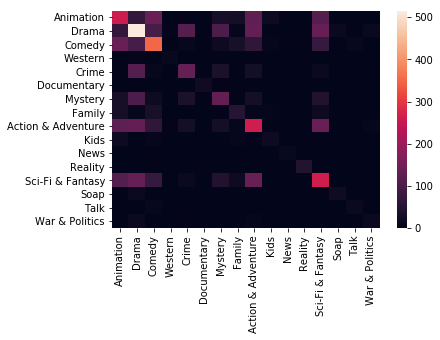

In [0]:
annot_lookup = []
for i in range(len(nr_ids)):
  if nr_ids[i] in Genre_ID_to_name:
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])
  else:
    annot_lookup.append(nr_ids[i])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

In [0]:
from sklearn.cluster import SpectralCoclustering

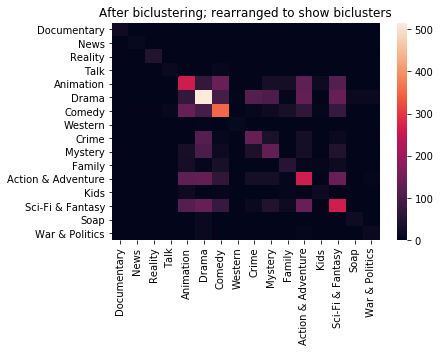

In [0]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
    
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

# Sample the same number of  tv shows per genre

In [0]:
# Done before, reading from pickle file now to maintain consistency of data!
# We now sample 100 tv shows per genre. Problem is that the sorting is by popular tvshows, so they will overlap. 
# Need to exclude shows that were already sampled. 
tvshows = []
baseyear = 2019

print('Starting pulling tvshows from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
done_ids=[]
for g_id in nr_ids:
    #print('Pulling tv shows for genre ID '+g_id)
    baseyear -= 1
    #pages to 60 are for 10000 tv shows;the number can change
    for page in range(1,60,1):
        time.sleep(0.5)
    
        url = 'https://api.themoviedb.org/3/discover/tv?api_key=' + api_key
        url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear) 
        url += '&with_genres=' + str(g_id) + '&page=' + str(page)

        data = urllib.request.urlopen(url).read()

        dataDict = json.loads(data)
        tvshows.extend(dataDict["results"])
    done_ids.append(str(g_id))
print("Pulled tv shows for genres - "+','.join(done_ids))

Starting pulling tvshows from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...
Pulled tv shows for genres - 16,18,35,37,80,99,9648,10751,10759,10762,10763,10764,10765,10766,10767,10768


In [0]:
# comment this cell after the first time
f6=open("tvshows_for_posters",'wb')
pickle.dump(tvshows,f6)
f6.close()

In [0]:
f6=open("tvshows_for_posters",'rb')
tvshows=pickle.load(f6)
f6.close()

In [0]:
tvshow_ids = [m['id'] for m in tvshows]
print ("originally we had ",len(tvshow_ids)," tv shows")
tvshow_ids=np.unique(tvshow_ids)
print (len(tvshow_ids))
seen_before=[]
no_duplicate_tvshows=[]
for i in range(len(tvshows)):
    tvshow=tvshows[i]
    id=tvshow['id']
    if id in seen_before:
        continue
#         print "Seen before"
    else:
        seen_before.append(id)
        no_duplicate_tvshows.append(tvshow)
print ("After removing duplicates we have ",len(no_duplicate_tvshows), " tv shows")

originally we had  15702  tv shows
11602
After removing duplicates we have  11602  tv shows


# Get a poster dataset of tv shows

In [0]:
poster_tvshows=[]
counter=0
tvshows_no_poster=[]
print("Total tv shows : ",len(tvshows))
print("Started downloading posters...")
for tvshow in tvshows:
    id=tvshow['id']
    title=tvshow['original_name']
    if counter==1:
        print('Downloaded first. Code is working fine. Please wait, this will take quite some time...')
    if counter%1000==0 and counter!=0:
        print ("Done with ",counter," tv shows!")
        print ("Trying to get poster for ",title)
    try:
        grab_poster_tmdb(title)
        poster_tvshows.append(tvshow)
    except:
        try:
            time.sleep(1)
            grab_poster_tmdb(title)
            poster_tvshows.append(tvshow)
        except:
            tvshows_no_poster.append(tvshow)
    counter+=1
print("Done with all the posters!")

Total tv shows :  15692
Started downloading posters...
Downloaded first. Code is working fine. Please wait, this will take quite some time...
Done with  1000  tv shows!
Trying to get poster for  D'Artacan y los Tres Mosqueperros
Done with  2000  tv shows!
Trying to get poster for  Great Performances
Done with  3000  tv shows!
Trying to get poster for  アウトブレイク・カンパニー 萌える侵略者
Done with  4000  tv shows!
Trying to get poster for  SOKO Stuttgart
Done with  5000  tv shows!
Trying to get poster for  Expedition Unknown
Done with  6000  tv shows!
Trying to get poster for  Married in America
Done with  7000  tv shows!
Trying to get poster for  Read All About It!
Done with  8000  tv shows!
Trying to get poster for  Long Ago and Far Away
Done with  9000  tv shows!
Trying to get poster for  メガロボクス
Done with  10000  tv shows!
Trying to get poster for  Timm Thaler
Done with  11000  tv shows!
Trying to get poster for  Bread N' Butter
Done with  12000  tv shows!
Trying to get poster for  Beyond Scared St

**TEST**

In [0]:
print (len(tvshows_no_poster))
print (len(poster_tvshows))

3280
12384


In [0]:
#comment this cell after the first time
f=open('poster_tvshows.pckl','wb')
pickle.dump(poster_tvshows,f)
f.close()

In [0]:
f=open('poster_tvshows.pckl','rb')
poster_tvshows=pickle.load(f)
f.close()

In [0]:
#comment this cell after the first time
f=open('no_poster_tvshows.pckl','wb')
pickle.dump(tvshows_no_poster,f)
f.close()

In [0]:
f=open('no_poster_tvshows.pckl','rb')
tvshows_no_poster=pickle.load(f)
f.close()

# Get the overveiw dataset

In [0]:
tvshows_with_overviews=[]
for i in range(len(no_duplicate_tvshows)):
    tvshow=no_duplicate_tvshows[i]
    id=tvshow['id']
    overview=tvshow['overview']
    
    if len(overview)==0:
        continue
    else:
        tvshows_with_overviews.append(tvshow)
        
len(tvshows_with_overviews)

9802

Binarized the overview

In [0]:
genres=[]
all_ids=[]
for i in range(len(tvshows_with_overviews)):
    tvshow=tvshows_with_overviews[i]
    id=tvshow['id']
    genre_ids=tvshow['genre_ids']
    genres.append(genre_ids)
    all_ids.extend(genre_ids)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)

**TEST**

In [0]:
print(Y.shape)
print(np.sum(Y, axis=0))

(9802, 27)
[  23   29 1759 3182    1   13   27 2218   11  238   12 1078 1225   19
  995   13   69 1017    5 1427  529  841 1076 1300  445  474  342]


In [0]:
len(list_of_genres)

16

modify the genre list due to some errors of the website

In [0]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.tv_list()['genres']
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [0]:
for i in set(all_ids):
    if i not in Genre_ID_to_name.keys():
        print( i)

10752
12
14
22
27
28
10402
36
53
878
10749


In [0]:
#comment some unnecessary adding if needed
Genre_ID_to_name[10749]="Romance"
Genre_ID_to_name[878]="Science Fiction"
Genre_ID_to_name[10402]="Music"
Genre_ID_to_name[28]="Action"
Genre_ID_to_name[27]="Horror"
Genre_ID_to_name[14]="Fantasy"
Genre_ID_to_name[12]="Adventure"
Genre_ID_to_name[10752 ]="War"
#Genre_ID_to_name[10040 ]=="TV MOVIE"
Genre_ID_to_name[22]="NULL"
Genre_ID_to_name[36]="History"
Genre_ID_to_name[53]="Thriller"

In [0]:
len(Genre_ID_to_name.keys())

27

In [0]:
sample_tvshow=tvshows_with_overviews[5]
sample_overview=sample_tvshow['overview']
sample_title=sample_tvshow['original_name']
print ("The overview for the tv shows",sample_title," is - \n\n")
print (sample_overview)

The overview for the tv shows Family Guy  is - 


Sick, twisted, politically incorrect and Freakin' Sweet animated series featuring the adventures of the dysfunctional Griffin family. Bumbling Peter and long-suffering Lois have three kids. Stewie (a brilliant but sadistic baby bent on killing his mother and taking over the world), Meg (the oldest, and is the most unpopular girl in town) and Chris (the middle kid, he's not very bright but has a passion for movies). The final member of the family is Brian - a talking dog and much more than a pet, he keeps Stewie in check whilst sipping Martinis and sorting through his own life issues.


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re

**TEST**

In [0]:
content=[]
for i in range(len(tvshows_with_overviews)):
    tvshow=tvshows_with_overviews[i]
    id=tvshow['id']
    overview=tvshow['overview']
    overview=overview.replace(',','')
    overview=overview.replace('.','')
    content.append(overview)

In [0]:
print (content[0])
print (len(content))

Saitama is a hero who only became a hero for fun After three years of “special” training though he’s become so strong that he’s practically invincible In fact he’s too strong—even his mightiest opponents are taken out with a single punch and it turns out that being devastatingly powerful is actually kind of a bore With his passion for being a hero lost along with his hair yet still faced with new enemies every day how much longer can he keep it going?
9789


In [0]:
get_tvshow_info_tmdb('Game of Thrones')['overview']

"Seven noble families fight for control of the mythical land of Westeros. Friction between the houses leads to full-scale war. All while a very ancient evil awakens in the farthest north. Amidst the war, a neglected military order of misfits, the Night's Watch, is all that stands between the realms of men and icy horrors beyond."

use the model of TF-IDF to remove some words

In [0]:
# The min_df paramter makes sure we exclude words that only occur very rarely
# The default also is to exclude any words that occur in every tvshows description
vectorize=CountVectorizer(max_df=0.97, min_df=0.003)
X=vectorize.fit_transform(content)

In [0]:
X.shape

(9802, 2259)

save the overview dataset

In [0]:
import pickle
f4=open('X.pckl','wb')
f5=open('Y.pckl','wb')
pickle.dump(X,f4)
pickle.dump(Y,f5)
f6=open('Genredict.pckl','wb')
pickle.dump(Genre_ID_to_name,f6)
f4.close()
f5.close()
f6.close()

# Classify the training dataset and testing dataset by TF-IDF model

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(9802, 2259)

In [0]:
msk = np.random.rand(X_tfidf.shape[0]) < 0.7

In [0]:
X_train_tfidf=X_tfidf[msk]
X_test_tfidf=X_tfidf[~msk]
Y_train=Y[msk]
Y_test=Y[~msk]
positions=range(len(tvshows_with_overviews))
# print positions
test_tvshows=np.asarray(positions)[~msk]
# test_tvshows

# SVM model used in overview dataset

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

define the grid search function

In [0]:
genre_names=[]
for i,v in Genre_ID_to_name.items():
    genre_names.append(v)
#print( genre_names)

In [0]:
def grid_search(train_x, train_y, test_x, test_y, genre_names, parameters, pipeline):
    grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
    grid_search_tune.fit(train_x, train_y)

    print
    print("Best parameters set:")
    print (grid_search_tune.best_estimator_.steps)
    print

    # measuring performance on test set
    print ("Applying best classifier on test data:")
    best_clf = grid_search_tune.best_estimator_
    predictions = best_clf.predict(test_x)

    print (classification_report(test_y, predictions, target_names=genre_names))

define the parameter for the one-vs-rest SVM algorithm

In [0]:
# LinearSVC
pipeline = Pipeline([  
    ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=3)),
    ])
parameters = {
    "clf__estimator__C":[0.01, 0.1, 1, 1.1,1.2,1.3],
    "clf__estimator__class_weight": ['balanced', None],
}
grid_search(X_train_tfidf, Y_train, X_test_tfidf, Y_test, genre_names, parameters, pipeline)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.6s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    9.8s
[Parallel(n_jobs=3)]: Done  22 out of  24 | elapsed:   11.9s remaining:    1.1s
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:   12.5s finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=3))]
Applying best classifier on test data:
                    precision    recall  f1-score   support

Action & Adventure       0.00      0.00      0.00         6
         Animation       0.00      0.00      0.00         8
            Comedy       0.77      0.73      0.75       344
             Crime       0.66      0.56      0.61       687
       Documentary       0.00      0.00      0.00         1
             Drama       0.00      0.00      0.00         1
            Family       0.00      0.00      0.00         6
              Kids       0.58      0.49      0.53       442
           Mystery       0.00      0.00      0.00         0
              News       0.82      0.49      0.61        55
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/m

the One-vs-one SVM algorithm

In [0]:
estim1 = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovo'))
estim1.fit(X_train_tfidf, Y_train)

In [0]:
predsest=estim1.predict(X_test_tfidf)
print (classification_report(Y_test, predsest, target_names=genre_names))

# Naive Bayesian model used in overview data

In [0]:
pipeline = Pipeline([
    ('clf', OneVsRestClassifier(MultinomialNB(
    fit_prior=True, class_prior=None))),
  ])
parameters = {
    'clf__estimator__alpha': (0.001,1e-2, 1e-3)
  }
grid_search(X_train_tfidf, Y_train, X_test_tfidf, Y_test, genre_names, parameters, pipeline)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   6 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=3)]: Done   3 out of   6 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   4 out of   6 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))


Best parameters set:
[('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=None))]
Applying best classifier on test data:
                    precision    recall  f1-score   support

Action & Adventure       0.00      0.00      0.00         6
         Animation       0.00      0.00      0.00         8
            Comedy       0.89      0.50      0.64       344
             Crime       0.68      0.52      0.59       687
       Documentary       0.00      0.00      0.00         1
             Drama       0.00      0.00      0.00         1
            Family       0.00      0.00      0.00         6
              Kids       0.71      0.20      0.31       442
           Mystery       0.00      0.00      0.00         0
              News       0.90      0.33      0.48        55
           Reality       0.00      0.00      0.00         1
  Sci-Fi & Fantasy       0.69      0.27      0.38       214
              Soap       0.92     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/m

# prediction models in the same evaluation method

In [0]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [0]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

ovo model

In [0]:
precs=[]
recs=[]
for i in range(len(test_tvshows)):
    if i%1==0:
        pos=test_tvshows[i]
        test_tvshow=tvshows_with_overviews[pos]
        gtids=test_tvshow['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#       print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictions[i])
        precs.append(a)
        recs.append(b)

print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

ovr model

In [0]:
precs=[]
recs=[]
for i in range(len(test_tvshows)):
    if i%1==0:
        pos=test_tvshows[i]
        test_tvshow=tvshows_with_overviews[pos]
        gtids=test_tvshow['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictions[i])
        precs.append(a)
        recs.append(b)

print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.42166155244914194 0.32000795544948285


naive bayes model

In [0]:
precs=[]
recs=[]
for i in range(len(test_tvshows)):
    if i%1==0:
        pos=test_tvshows[i]
        test_tvshow=tvshows_with_overviews[pos]
        gtids=test_tvshow['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],tvshows_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictionsnb[i])
        precs.append(a)
        recs.append(b)

print (np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.46527975992261705 0.7044538794538794


# Deep learning model in the poster dataset

In [0]:
# Loading the list of tvshows we had downloaded posters for eariler - 
f=open('poster_tvshows.pckl','rb')
poster_tvshows=pickle.load(f)
f.close()

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
allnames=os.listdir(poster_folder)
imnames=[j for j in allnames if j.endswith('.jpg')]
feature_list=[]
genre_list=[]
file_order=[]
print ("Starting extracting VGG features for scraped images. This will take time, Please be patient...")
print ("Total images = ",len(imnames))
failed_files=[]
succesful_files=[]
i=0
for tv in poster_tvshows:
    i+=1
    tv_name=tv['original_name']
    tv_name1=tv_name.replace(':','/')
    poster_name=tv_name.replace(' ','_')+'.jpg'
    if poster_name in imnames:
        img_path=poster_folder+poster_name
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            succesful_files.append(poster_name)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            features = model.predict(x)
            file_order.append(img_path)
            feature_list.append(features)
            genre_list.append(tv['genre_ids'])
            if np.max(np.asarray(feature_list))==0.0:
                print('problematic',i)
            if i%200==0 or i==1:
                print ("Working on Image : ",i)
        except:
            failed_files.append(poster_name)
            continue
        
    else:
        continue
print ("Done with all features, please pickle for future use!")

Starting extracting VGG features for scraped images. This will take time, Please be patient...
Total images =  8252
Working on Image :  1
Working on Image :  200
Working on Image :  400
Working on Image :  600
Working on Image :  800
Working on Image :  1000
Working on Image :  1400
Working on Image :  1600
Working on Image :  1800
Working on Image :  2000
Working on Image :  2200
Working on Image :  2400
Working on Image :  2600
Working on Image :  2800
Working on Image :  3000
Working on Image :  3200
Working on Image :  3400
Working on Image :  3600
Working on Image :  3800
Working on Image :  4000
Working on Image :  4200
Working on Image :  4400
Working on Image :  4600
Working on Image :  4800
Working on Image :  5000
Working on Image :  5400
Working on Image :  5600
Working on Image :  5800
Working on Image :  6000
Working on Image :  6200
Working on Image :  6400
Working on Image :  6600
Working on Image :  6800
Working on Image :  7000
Working on Image :  7200
Working on Image

In [0]:
print(len(genre_list))
print(len(feature_list))

11362
11362


In [0]:
# Reading from pickle below, this code is not to be run.
list_pickled=(feature_list,file_order,failed_files,succesful_files,genre_list)
f=open('posters_new_features.pckl','wb')
pickle.dump(list_pickled,f)
f.close()
print("Features dumped to pickle file")

Features dumped to pickle file


In [0]:
f7=open('posters_new_features.pckl','rb')
list_pickled=pickle.load(f7)
f7.close()

In [0]:
(feature_list,files,failed,succesful,genre_list)=list_pickled

In [0]:
(a,b,c,d)=feature_list[0].shape
feature_size=a*b*c*d
print(feature_size)

25088


In [0]:
np_features=np.zeros((len(feature_list),feature_size))
for i in range(len(feature_list)):
    feat=feature_list[i]
    reshaped_feat=feat.reshape(1,-1)
    np_features[i]=reshaped_feat

In [0]:
X=np_features
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genre_list)

In [0]:
Y.shape

(11362, 28)

In [0]:
visual_problem_data=(X,Y)
f8=open('visual_problem_data_clean.pckl','wb')
pickle.dump(visual_problem_data,f8)
f8.close()

In [0]:
f8=open('visual_problem_data_clean.pckl','rb')
visual_features=pickle.load(f8)
f8.close()

In [0]:
(X,Y)=visual_features

In [0]:
X.shape

(11362, 25088)

In [0]:
mask = np.random.rand(len(X)) < 0.8
X_train=X[mask]
X_test=X[~mask]
Y_train=Y[mask]
Y_test=Y[~mask]
X_test.shape

(2296, 25088)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model_visual = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(28),
    Activation('sigmoid'),
])
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

model_visual.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model_visual.fit(X_train, Y_train, epochs=10, batch_size=64,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
9066/9066 [==============================] - 5s 597us/step - loss: 0.5045 - acc: 0.9149
Epoch 2/10
9066/9066 [==============================] - 3s 381us/step - loss: 0.1106 - acc: 0.9651
Epoch 3/10
9066/9066 [==============================] - 3s 385us/step - loss: 0.0439 - acc: 0.9871
Epoch 4/10
9066/9066 [==============================] - 4s 391us/step - loss: 0.0287 - acc: 0.9929
Epoch 5/10
9066/9066 [==============================] - 4s 387us/step - loss: 0.0231 - acc: 0.9954
Epoch 6/10
9066/9066 [==============================] - 3s 376us/step - loss: 0.0199 - acc: 0.9966
Epoch 7/10
9066/9066 [==============================] - 3s 376us/step - loss: 0.0190 - acc: 0.9970
Epoch 8/10
9066/9066 [==============================] - 3s 375us/step - loss: 0.0187 - acc: 0.9974
Epoch 9/10
9066/9066 [==============================] - 3s 376us/step - loss: 0.0191 - acc: 0.9975
Epoch 10/10
9066/9066 [==============================] - 3s 3

In [0]:
model_visual.fit(X_train, Y_train, epochs=50, batch_size=64,verbose=0)

In [0]:
Y_preds=model_visual.predict(X_test)
sum(sum(Y_preds))

4302.858320653439

In [0]:
f6=open('Genredict.pckl','rb')
Genre_ID_to_name=pickle.load(f6)
f6.close()

In [0]:
print(sum(Y_preds[1]))
print(sum(Y_preds[2]))

3.0
1.9999998807907104


In [0]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [0]:
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(22):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print ("Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names))

Predicted:  Kids,Animation,Soap  Actual:  Animation,Comedy,Kids
Predicted:  Animation,Kids,Drama  Actual:  Animation,Drama,Kids
Predicted:  Soap,Animation,Comedy  Actual:  Animation
Predicted:  Kids,Comedy,Animation  Actual:  Animation
Predicted:  Drama,Animation,Soap  Actual:  Animation,Drama,Kids
Predicted:  Mystery,Drama,Soap  Actual:  Drama,Mystery
Predicted:  TV Movie,Crime,Drama  Actual:  Drama,Crime
Predicted:  Talk,Comedy,Drama  Actual:  Drama,Comedy
Predicted:  Sci-Fi & Fantasy,Kids,Drama  Actual:  Drama
Predicted:  Comedy,Drama,Animation  Actual:  Animation,Drama,Comedy
Predicted:  Soap,Comedy,Animation  Actual:  Animation,Comedy
Predicted:  Reality,War & Politics,Comedy  Actual:  Comedy
Predicted:  Western,Kids,Drama  Actual:  Drama,Western
Predicted:  Kids,Crime,Drama  Actual:  Drama,Crime,Kids
Predicted:  Comedy,Crime,Drama  Actual:  Drama,Crime,Mystery
Predicted:  Comedy,Soap,Drama  Actual:  Drama,Crime
Predicted:  Sci-Fi & Fantasy,Crime,Documentary  Actual:  Crime,Docume

In [0]:
print( np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.4397502903600465 0.6469367015098723


In [0]:
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(28):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%500==0:
        print ("Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names))

Predicted:  Kids,Animation,Soap  Actual:  Animation,Comedy,Kids,Soap
Predicted:  Soap,Comedy,Animation  Actual:  Animation,Comedy
Predicted:  Drama,Kids,Animation  Actual:  Animation,Mystery
Predicted:  Kids,Animation,Soap  Actual:  Animation,Drama,Kids,Soap
Predicted:  Drama,Animation,Soap  Actual:  Animation,Drama,Comedy,Kids,Soap


In [0]:
print( np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.5476190476190476 0.6860917537746806


In [0]:
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(28):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_4=np.argsort(row)[-4:]
    predicted_genres=[]
    for genre in top_4:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%500==0:
        print ("Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names))

Predicted:  Comedy,Kids,Animation,Soap  Actual:  Animation,Comedy,Kids,Soap
Predicted:  TV Movie,Soap,Comedy,Animation  Actual:  Animation,Comedy
Predicted:  Soap,Drama,Kids,Animation  Actual:  Animation,Mystery
Predicted:  Drama,Kids,Animation,Soap  Actual:  Animation,Drama,Kids,Soap
Predicted:  Kids,Drama,Animation,Soap  Actual:  Animation,Drama,Comedy,Kids,Soap


In [0]:
print( np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.4541594076655052 0.7537819396051104


# Deep learning for textual feature

You can download the dictionary from  [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit )-
Download it to the directory of this tutorial i.e. in the same folder as this ipython notebook.

In [0]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('GoogleNews-vectors-negative300.bin.gz')

import os
print(os.listdir())

     |████████████████████████████████| 993kB 5.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
['.config', '.ipynb_checkpoints', 'tvshow_list.pckl', 'classifer_nb', 'Y.pckl', 'Genredict.pckl', 'GoogleNews-vectors-negative300.bin.gz', 'adc.json', 'X.pckl', 'tvshows_for_posters', 'sample_data']


In [0]:
from gensim import models
model2 = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
print (model2['king'].shape)
print (model2['dog'].shape)

(300,)
(300,)


In [0]:
final_tvshows_set = tvshows_with_overviews
len(final_tvshows_set)

9802

In [0]:
!pip install stop-words

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [0]:
tvshow_mean_wordvec=np.zeros((len(final_tvshows_set),300))
print(tvshow_mean_wordvec.shape)

(9802, 300)


In [0]:
genres=[]
rows_to_delete=[]
for i in range(len(final_tvshows_set)):
    tv=final_tvshows_set[i]
    tvshow_genres=tv['genre_ids']
    genres.append(tvshow_genres)
    overview=tv['overview']
    tokens = tokenizer.tokenize(overview)
    stopped_tokens = [k for k in tokens if not k in en_stop]
    count_in_vocab=0
    s=0
    if len(stopped_tokens)==0:
        rows_to_delete.append(i)
        genres.pop(-1)

    else:
        for tok in stopped_tokens:
            if tok.lower() in model2.vocab:
                count_in_vocab+=1
                s+=model2[tok.lower()]
        if count_in_vocab!=0:
            tvshow_mean_wordvec[i]=s/float(count_in_vocab)
        else:
            rows_to_delete.append(i)
            genres.pop(-1)

In [0]:
len(genres)

9791

In [0]:
mask2=[]
for row in range(len(tvshow_mean_wordvec)):
    if row in rows_to_delete:
        mask2.append(False)
    else:
        mask2.append(True)

In [0]:
X=tvshow_mean_wordvec[mask2]
print(X.shape)
Y=mlb.fit_transform(genres)
print(Y.shape)

(9791, 300)
(9791, 27)


In [0]:
textual_features=(X,Y)
f9=open('textual_features.pckl','wb')
pickle.dump(textual_features,f9)
f9.close()

In [0]:
# textual_features=(X,Y)
f9=open('textual_features.pckl','rb')
textual_features=pickle.load(f9)
f9.close()

In [0]:
(X,Y)=textual_features
print(X.shape)
print(Y.shape)

(9791, 300)
(9791, 27)


In [0]:
mask_text=np.random.rand(len(X))<0.8
X_train=X[mask_text]
Y_train=Y[mask_text]
X_test=X[~mask_text]
Y_test=Y[~mask_text]

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_textual = Sequential([
    Dense(300, input_shape=(300,)),
    Activation('relu'),
    Dense(27),
    Activation('softmax'),
])

model_textual.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [0]:
model_textual.fit(X_train, Y_train, epochs=10, batch_size=500)
model_textual.fit(X_train, Y_train, epochs=10000, batch_size=500,verbose=0)
score = model_textual.evaluate(X_test, Y_test, batch_size=249)
print("%s: %.2f%%" % (model_textual.metrics_names[1], score[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
7876/7876 [==============================] - 1s 164us/step - loss: 0.2300 - acc: 0.9306
Epoch 2/10
7876/7876 [==============================] - 0s 12us/step - loss: 0.2035 - acc: 0.9306
Epoch 3/10
7876/7876 [==============================] - 0s 9us/step - loss: 0.1917 - acc: 0.9307
Epoch 4/10
7876/7876 [==============================] - 0s 9us/step - loss: 0.1821 - acc: 0.9313
Epoch 5/10
7876/7876 [==============================] - 0s 9us/step - loss: 0.1742 - acc: 0.9322
Epoch 6/10
7876/7876 [==============================] - 0s 9us/step - loss: 0.1683 - acc: 0.9330
Epoch 7/10
7876/7876 [==============================] - 0s 9us/step - loss: 0.1639 - acc: 0.9339
Epoch 8/10
7876/7876 [==============================] - 0s 10us/step - loss: 0.1604 - acc: 0.9346
Epoch 9/10
7876/7876 [==============================] - 0s 11us/step - loss: 0.1575 - acc: 0.9352
Epoch 10/10
1915/1915 [==============================] - 0s 33us/step
acc:

In [0]:
Y_preds=model_textual.predict(X_test)
genre_list.append(10749)
genre_list.append(10752)
genre_list.append(12)
genre_list.append(14)
genre_list.append(22)
genre_list.append(27)
genre_list.append(28)
genre_list.append(10402)
genre_list.append(36)
genre_list.append(53)
genre_list.append(878)


Three-class prediction

In [0]:
print ("Our predictions for the tvshows are - \n")
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(27):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%500==0:
        print ("Predicted: ",predicted_genres," Actual: ",gt_genre_names)

Our predictions for the tvshows are - 

Predicted:  ['Drama', 'Kids', 'Action & Adventure']  Actual:  ['Animation', 'Comedy', 'Action & Adventure']
Predicted:  ['Family', 'Crime', 'Comedy']  Actual:  ['Comedy']
Predicted:  ['Crime', 'Drama', 'Comedy']  Actual:  ['Animation', 'Comedy', 'Mystery']
Predicted:  ['Western', 'Reality', 'Documentary']  Actual:  ['Reality']


In [0]:
print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.4266318537859008 0.7264577893820714


Single prediction

In [0]:
print ("Our predictions for the tvshows are - \n")
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(27):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_1=np.argsort(row)[-1:]
    predicted_genres=[]
    for genre in top_1:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%500==0:
        print ("Predicted: ",predicted_genres," Actual: ",gt_genre_names)

Our predictions for the tvshows are - 

Predicted:  ['Action & Adventure']  Actual:  ['Animation', 'Comedy', 'Action & Adventure']
Predicted:  ['Comedy']  Actual:  ['Comedy']
Predicted:  ['Comedy']  Actual:  ['Animation', 'Comedy', 'Mystery']
Predicted:  ['Documentary']  Actual:  ['Reality']


In [0]:
print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.637597911227154 0.40818102697998265


In [0]:
print ("Our predictions for the tvshows are - \n")
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(27):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_4=np.argsort(row)[-4:]
    predicted_genres=[]
    for genre in top_4:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%500==0:
        print ("Predicted: ",predicted_genres," Actual: ",gt_genre_names)

Our predictions for the tvshows are - 

Predicted:  ['Comedy', 'Drama', 'Kids', 'Action & Adventure']  Actual:  ['Animation', 'Comedy', 'Action & Adventure']
Predicted:  ['Drama', 'Family', 'Crime', 'Comedy']  Actual:  ['Comedy']
Predicted:  ['Mystery', 'Crime', 'Drama', 'Comedy']  Actual:  ['Animation', 'Comedy', 'Mystery']
Predicted:  ['Action & Adventure', 'Western', 'Reality', 'Documentary']  Actual:  ['Reality']


In [0]:
print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.3663185378590078 0.8106179286335944


In [0]:
print ("Our predictions for the tvshows are - \n")
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(27):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_5=np.argsort(row)[-5:]
    predicted_genres=[]
    for genre in top_5:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%500==0:
        print ("Predicted: ",predicted_genres," Actual: ",gt_genre_names)

Our predictions for the tvshows are - 

Predicted:  ['Family', 'Comedy', 'Drama', 'Kids', 'Action & Adventure']  Actual:  ['Animation', 'Comedy', 'Action & Adventure']
Predicted:  ['Western', 'Drama', 'Family', 'Crime', 'Comedy']  Actual:  ['Comedy']
Predicted:  ['Action & Adventure', 'Mystery', 'Crime', 'Drama', 'Comedy']  Actual:  ['Animation', 'Comedy', 'Mystery']
Predicted:  ['News', 'Action & Adventure', 'Western', 'Reality', 'Documentary']  Actual:  ['Reality']


In [0]:
print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.31791122715404696 0.8644560487380331
